There are various ways we can examine a model - both before and after we fit it:

- Plot the states diagram from the data. This is one of the first things a researcher might want to look at. This will allow her to understand the avialble transitions.

- Display a transition table containing all available transitions and censored events.

- Compute and display a Path frequencies table. Understanding the data path statistics is important in multistate models and may uncover interesting findings.

- Examine competing risks states stackplots from an origin state. Understand how different origin states paths behave over time.

## States diagram  

In [1]:
from pymsm.datasets import prep_covid_hosp_data, plot_covid_hosp
dataset, state_labels = prep_covid_hosp_data()
plot_covid_hosp(dataset, state_labels)

100%|██████████| 2675/2675 [00:05<00:00, 494.79it/s]


# Transition table

In [2]:
from pymsm.multi_state_competing_risks_model import MultiStateModel

msm = MultiStateModel(
    dataset=dataset,
    terminal_states=[4],
    state_labels=state_labels,
)

msm.prep_transition_table()

target_state,Censored,Discharged\Recovered,Mild or Moderate,Severe,Deceased
origin_state,,,,,
Discharged\Recovered,2044,0,98,2,0
Mild or Moderate,309,2135,0,275,52
Severe,135,9,193,0,135


In [3]:
msm.transition_matrix

target_state,0,1,2,3,4
origin_state,,,,,
1,2044,0,98,2,0
2,309,2135,0,275,52
3,135,9,193,0,135


In [4]:
msm.transition_table

target_state,Censored,Discharged\Recovered,Mild or Moderate,Severe,Deceased
origin_state,,,,,
Discharged\Recovered,2044,0,98,2,0
Mild or Moderate,309,2135,0,275,52
Severe,135,9,193,0,135


## Path frequencies  

In [5]:
state_labels_short = {0: "C", 1: "R", 2: "M", 3: "S", 4: "D"}

from pymsm.statistics import get_path_frequencies
path_freqs = get_path_frequencies(dataset, state_labels_short)
path_freqs.head(20)

M->R                1906
M                    202
M->S                  76
S->D                  74
M->S->D               59
M->S->M->R            46
M->D                  44
M->R->M->R            42
S                     42
M->R->M               36
M->S->M               35
S->M->R               28
S->M                  27
M->S->M->S             8
S->R                   6
S->M->S                5
S->M->S->M->R          3
S->M->D                3
M->S->M->S->M          3
M->S->M->S->M->R       3
dtype: int64

# Examine competing risks from origin state  


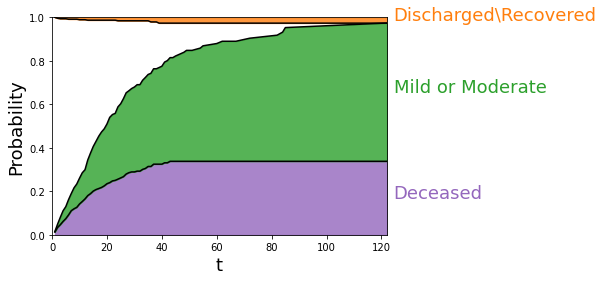

In [6]:
origin_state = 3
competing_risk_dataset = msm.competing_risk_dataset
competing_risk_dataset = competing_risk_dataset[competing_risk_dataset['origin_state'] == origin_state]


from pymsm.plotting import competingrisks_stackplot

competingrisks_stackplot(
    data=competing_risk_dataset,
    duration_col='time_transition_to_target',
    event_col ='target_state',
    order_top= [1],
    order_bottom = [4,2],
    state_labels = state_labels);